In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

# 1. Twitch API data

The URL `https://wind-bow.glitch.me/twitch-api/channels/{CHANNEL_NAME}` is an API from twitch to get data from twitch channels.

Get the data from the following channels:

```
["ESL_SC2", "OgamingSC2", "cretetion", "freecodecamp", 
    "storbeck", "habathcx", "RobotCaleb", "noobs2ninjas",
    "ninja", "shroud", "Dakotaz", "esltv_cs", "pokimane", 
    "tsm_bjergsen", "boxbox", "wtcn", "a_seagull",
    "kinggothalion", "amazhs", "jahrein", "thenadeshot", 
    "sivhd", "kingrichard"]
```

To make into a dataframe that looks like this:

![](twitch.png)

In [2]:
channels = ["ESL_SC2", "OgamingSC2", "cretetion", "freecodecamp", "storbeck", "habathcx", "RobotCaleb", "noobs2ninjas",
            "ninja", "shroud", "Dakotaz", "esltv_cs", "pokimane", "tsm_bjergsen", "boxbox", "wtcn", "a_seagull",
            "kinggothalion", "amazhs", "jahrein", "thenadeshot", "sivhd", "kingrichard"]

columns = ["id", "display_name", "status", "followers", "views"]
df = pd.DataFrame(columns = columns)

In [3]:
for i in range(len(channels)):
    r = requests.get(f"https://wind-bow.glitch.me/twitch-api/channels/{channels[i]}")
    content = json.loads(r.content)
    
    # skips passed the ones that return an error
    if content["status"] != 404:
        df.loc[i] = [content["_id"], content["display_name"], content["status"], content["followers"], content["views"]]

In [4]:
# only 7 remain of the original 23 o.o
df

,id,display_name,status,followers,views
0,30220059,ESL_SC2,RERUN: StarCraft 2 - Terminator vs. Parting (P...,135394,60991791
1,71852806,OgamingSC2,UnderDogs - Rediffusion - Qualifier.,40895,20694507
2,90401618,cretetion,It's a Divison kind of Day,908,11631
3,79776140,FreeCodeCamp,Greg working on Electron-Vue boilerplate w/ Ak...,10122,163747
4,86238744,storbeck,None,10,1019
5,6726509,Habathcx,Massively Effective,14,764
6,54925078,RobotCaleb,Code wrangling,20,4602
7,82534701,noobs2ninjas,Building a new hackintosh for #programming and...,835,48102


# 2. App Store Reviews

The Apple app store has a `GET` API to get reviews on apps. The URL is:

```
https://itunes.apple.com/{COUNTRY_CODE}/rss/customerreviews/id={APP_ID_HERE}/page={PAGE_NUMBER}/sortby=mostrecent/json
```

Note that you need to provide:

- The country code (eg. `'us'`, `'gb'`, `'ca'`, `'au'`) 

- The app ID. This can be found in the web page for the app right after `id`. For instance, Candy Crush's US webpage is:

`https://apps.apple.com/us/app/candy-crush-saga/id553834731`

So here the ID would be `553834731`.

- The "Page Number". The request responds with multiple pages of data, but sends them one at a time. So you can cycle through the data pages for any app on any country.

### 2.1 English app reviews

Get all english reviews you can for Candy Crush, Tinder, the Facebook app and Twitter (you have to get them from all the english-speaking countries you can think of!).

In [2]:
apps = {"Candy Crush Saga": 553834731, "Tinder": 547702041, "Facebook": 284882215, "Twitter": 333903271}
reviews = {"Candy Crush Saga": [], "Tinder": [], "Facebook": [], "Twitter": []}
ratings = {"Candy Crush Saga": [], "Tinder": [], "Facebook": [], "Twitter": []}

# according to wiki, these are the countries where English is an official language (de facto & de juro)
countries = ["au", "us", "ca", "uk", "nz", "gh", "ng", "fj", "sg", "ie", "ke", "gd", "za", "ag", "bs", "bb", "bz", "dm", "gy", 
            "jm", "lr", "pg", "kn", "lc", "vc", "sl", "tt"]

In [7]:
page = 1
next = False

for app in apps:
    
    for country in countries:
        next = False 
        while not next:
            try:
                r = requests.get(f"https://itunes.apple.com/{country}/rss/customerreviews/id={apps[app]}/page={page}/sortby=mostrecent/json")
                content = json.loads(r.content)

                for review in content["feed"]["entry"]:
                    reviews[app].append(review["content"]["label"])

                page += 1

            except:
                page = 1
                next = True

In [11]:
# The results are in the reviews variable, under their respective keys.

# ** EYE WARNING ** 
# They have not been sorted or organized, just jam packed in there.

# reviews["Candy Crush Saga"]

### 2.2 Best version

For each app, get the version that is the best rated.

Make a visualization of the ratings per versions per app to show this.

In [37]:
page = 1
next = False
rating = {}

for app in apps:
    
    for country in countries:
        
        next = False 
        while not next:
            
            try:
                r = requests.get(f"https://itunes.apple.com/{country}/rss/customerreviews/id={apps[app]}/page={page}/sortby=mostrecent/json")
                content = json.loads(r.content)

                for review in content["feed"]["entry"]:
                    
                    if review["im:version"]["label"] in rating:
                        rating[review["im:version"]["label"]] += int(review["im:rating"]["label"])
                    
                    else:
                        rating[review["im:version"]["label"]] = int(review["im:rating"]["label"])
                
                page += 1

            except:
                page = 1
                next = True
    
    ratings[app] = rating
    rating = {}

In [40]:
# The results are in the reviews variable, under their respective keys.

# ** EYE WARNING ** 
# They have not been sorted or organized, just jam packed in there.

# ratings["Candy Crush Saga"]

C:\Users\rando\anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  
C:\Users\rando\anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\rando\anaconda3\lib\site-packages\ipykernel_launcher.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\rando\anaconda3\lib\site-packages\ipykernel_launcher.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator


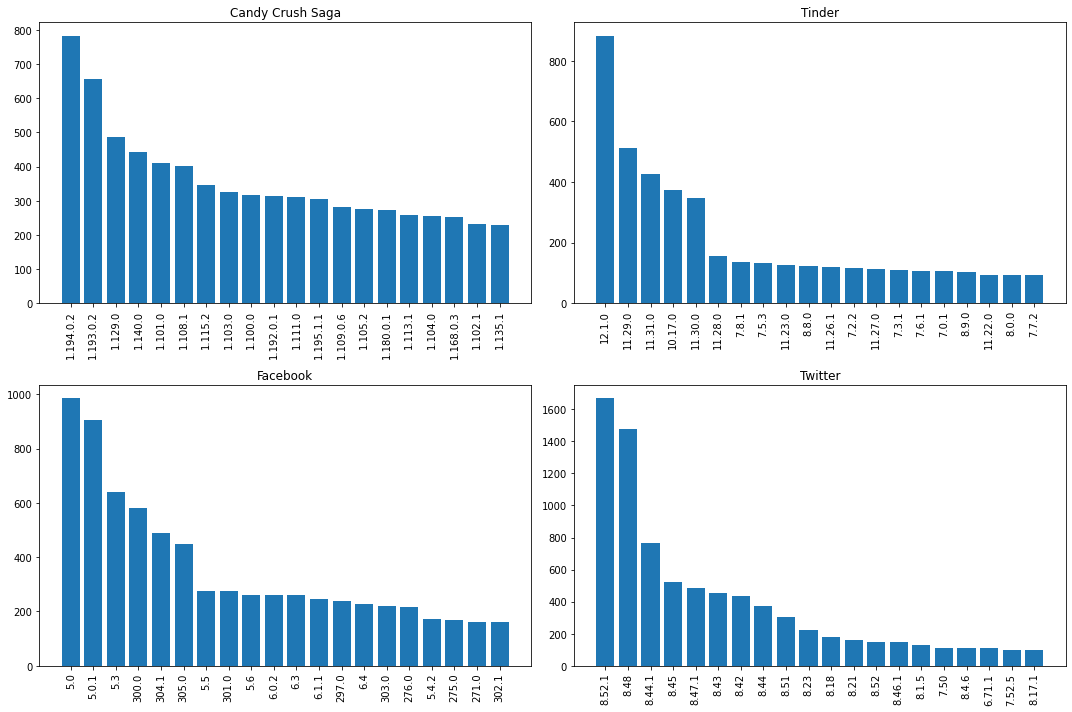

In [157]:
# couldn't figure out how to do it in one loop :(
# I sorted the ratings dictionary based on most popular, then kept the 20 highest rated versions and plotted it

fig, ax = plt.subplots(2, 2, figsize=(15,10))
    
ratings["Candy Crush Saga"] = dict(sorted(ratings["Candy Crush Saga"].items(), key=lambda item: item[1], reverse = True))
data = list(ratings["Candy Crush Saga"].items())[:20]
data = dict(data)

keys = data.keys()
values = data.values()

ax[0][0].bar(keys, values);
ax[0][0].set_xticklabels(keys, rotation=90)
ax[0][0].set_title("Candy Crush Saga")

ratings["Tinder"] = dict(sorted(ratings["Tinder"].items(), key=lambda item: item[1], reverse = True))
data = list(ratings["Tinder"].items())[:20]
data = dict(data)

keys = data.keys()
values = data.values()

ax[0][1].bar(keys, values);
ax[0][1].set_xticklabels(keys, rotation=90)
ax[0][1].set_title("Tinder")

ratings["Facebook"] = dict(sorted(ratings["Facebook"].items(), key=lambda item: item[1], reverse = True))
data = list(ratings["Facebook"].items())[:20]
data = dict(data)

keys = data.keys()
values = data.values()

ax[1][0].bar(keys, values);
ax[1][0].set_xticklabels(keys, rotation=90)
ax[1][0].set_title("Facebook")

ratings["Twitter"] = dict(sorted(ratings["Twitter"].items(), key=lambda item: item[1], reverse = True))
data = list(ratings["Twitter"].items())[:20]
data = dict(data)

keys = data.keys()
values = data.values()

ax[1][1].bar(keys, values);
ax[1][1].set_xticklabels(keys, rotation=90);
ax[1][1].set_title("Twitter")

fig.tight_layout()

### 2.3 Top words

Which word for each app is most common in the 5 star and in the 1-star review's titles?

Note: `df.title.str.get_dummies()` is your friend

Note: This might create a lot of data! Try to break down your analysis in chunks if it doesn't work.

In [56]:
page = 1
next = False
five_star_words = []
one_star_words = []

for app in apps:
    
    for country in countries:
        
        next = False 
        while not next:
            
            try:
                r = requests.get(f"https://itunes.apple.com/{country}/rss/customerreviews/id={apps[app]}/page={page}/sortby=mostrecent/json")
                content = json.loads(r.content)

                for review in content["feed"]["entry"]:
                    
                    if review["im:rating"]["label"] == '5':
                        for word in review["content"]["label"].split():
                            word = word.replace(",", "")
                            word = word.replace("?", "")
                            word = word.replace("!", "")
                            word = word.replace(".", "")
                            five_star_words.append(word)
                    
                    elif review["im:rating"]["label"] == '1':
                        for word in review["content"]["label"].split():
                            word = word.replace(",", "")
                            word = word.replace("?", "")
                            word = word.replace("!", "")
                            word = word.replace(".", "")
                            one_star_words.append(word)
                
                page += 1

            except:
                page = 1
                next = True

In [57]:
five_star_df = pd.DataFrame(columns=["words"], data=five_star_words)
one_star_df = pd.DataFrame(columns=["words"], data=one_star_words)

In [58]:
five_star_df.words.value_counts()

I         2677
the       2396
to        2283
and       2119
it        1787
          ... 
10/15        1
1351         1
Anyway       1
تكون         1
%            1
Name: words, Length: 9010, dtype: int64

In [59]:
one_star_df.words.value_counts()

to            8203
the           7835
I             7834
and           7245
a             4554
              ... 
sorry)           1
sacar            1
ironically       1
namely           1
anti-man         1
Name: words, Length: 16865, dtype: int64

In [ ]:
# Most used word for 5 star reviews: I
# Most used word for 1 star reviews: to

# 3 (STRETCH) IMDB scraping

IMDB has structured web pages. We can exploit this to scrape movie data.

Usinf the following URL:

`https://www.imdb.com/search/title/?groups=top_1000&start={PAGE_NUMBER}&ref_=adv_nxt`

With the following headers in your `GET` request: `{"Accept-Language": "en-US,en;q=0.5"}`

You can generate a dataframe like this one by cycling over the page numbers in the URL requested:

![](IMDB.png)

Note that the following  page attribues will be of interest:

- `div` with a class of `lister-item mode-advanced`

- Various `span` objects within that `div` like `lister-item-year` and `runtime` and `metascore`